In [ ]:
# Install dependencies
!pip install -q seaborn scikit-learn matplotlib pandas

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import pandas as pd

sns.set(style="whitegrid")

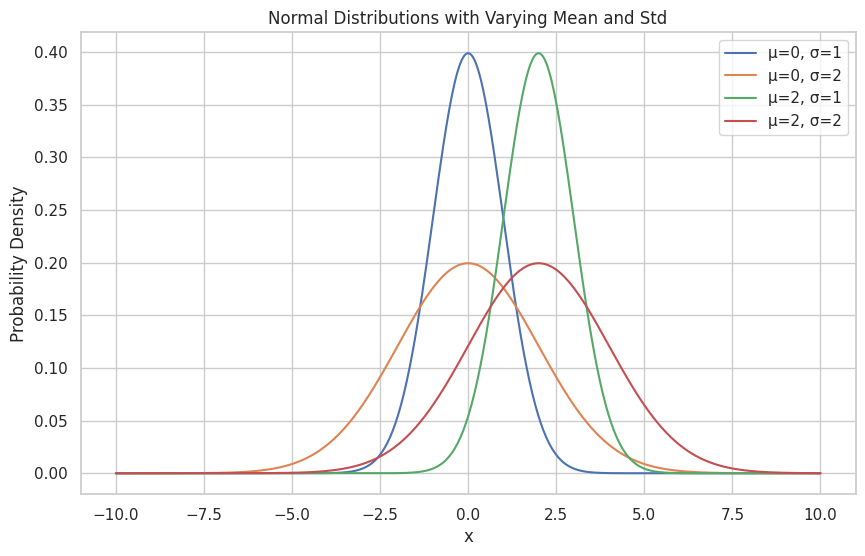

In [ ]:
#@title 📊 Distributions with varying mean and std

x = np.linspace(-10, 10, 500)
params = [(0,1), (0,2), (2,1), (2,2)]

plt.figure(figsize=(10,6))
for mean, std in params:
    y = 1/(std * np.sqrt(2 * np.pi)) * np.exp(- (x - mean)**2 / (2 * std**2))
    plt.plot(x, y, label=f"μ={mean}, σ={std}")

plt.title("Normal Distributions with Varying Mean and Std")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#@title 🔍 Generate synthetic 2D data

X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2,
                           class_sep=1.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train classifiers
log_reg = LogisticRegression().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)


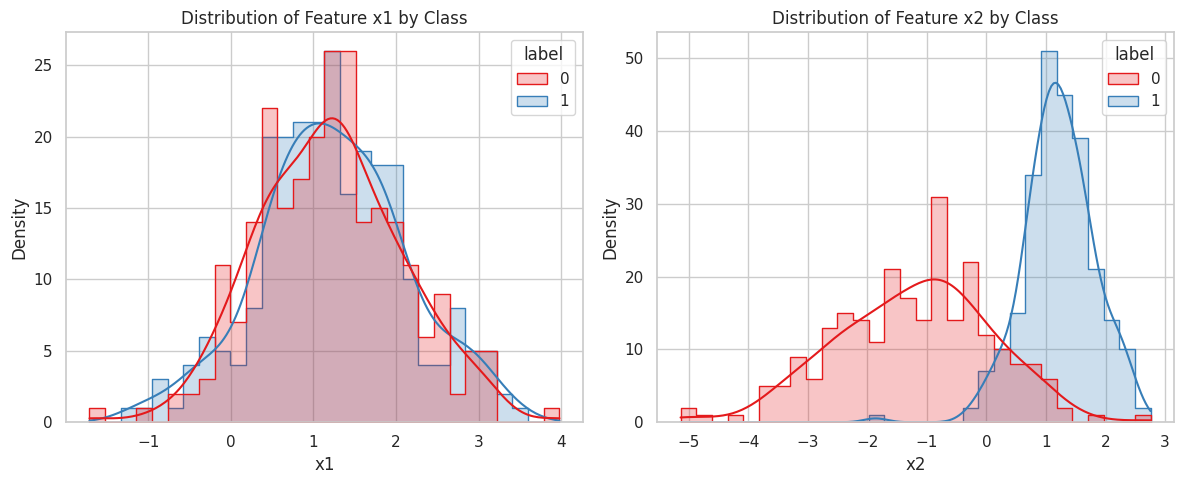

In [ ]:
#@title 🔍 Inspect synthetic 2D data
df = pd.DataFrame(X, columns=["x1", "x2"])
df["label"] = y

# Plot for feature x1
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="x1", hue="label", bins=30, kde=True, palette="Set1", element="step")
plt.title("Distribution of Feature x1 by Class")
plt.xlabel("x1")
plt.ylabel("Density")

# Plot for feature x2
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="x2", hue="label", bins=30, kde=True, palette="Set1", element="step")
plt.title("Distribution of Feature x2 by Class")
plt.xlabel("x2")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

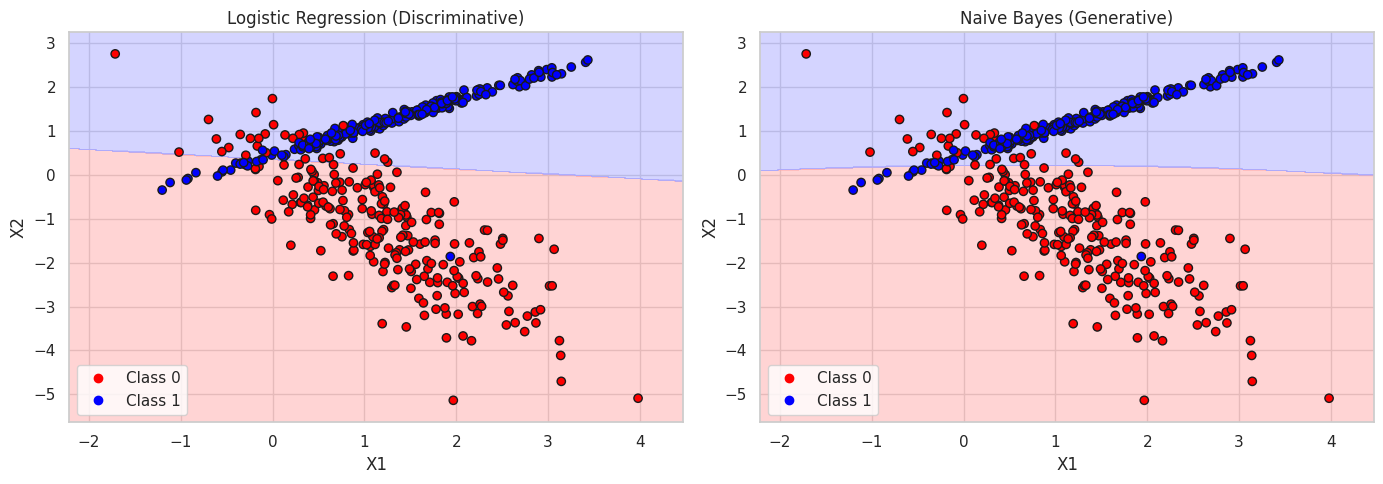

In [ ]:
#@title 🧭 Plot decision boundaries

def plot_decision_boundary(clf, ax, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_decision_boundary(log_reg, axes[0], "Logistic Regression (Discriminative)")
plot_decision_boundary(nb, axes[1], "Naive Bayes (Generative)")
plt.tight_layout()
plt.show()


**Why boundaries differ?**

LR: Learns best separating line + uses all X to estimate P(Y|X)

NV: Uses Bayes Rule to invert P(X|Y) into P(Y|X).


**Practically...**

LR: “Imagine you have two animal species and you only care about building a fence between them.”

NB: “Now imagine you study how each species moves, eats, and lives... then you infer which species you're likely looking at.”

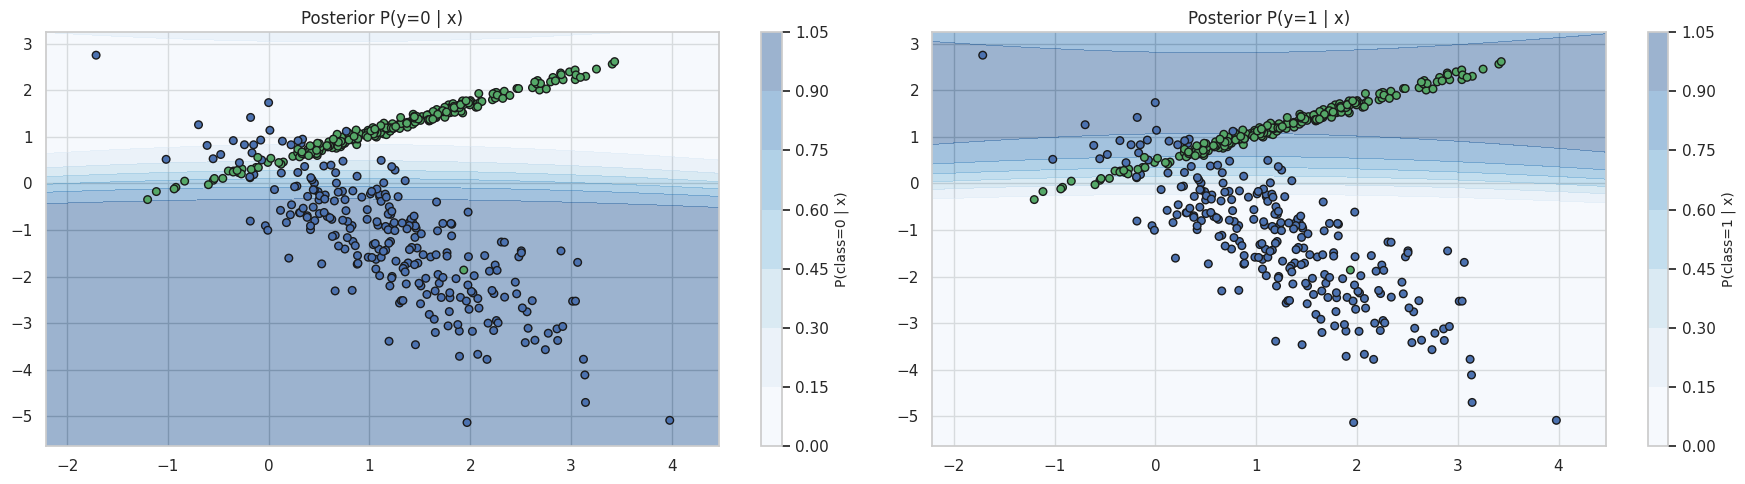

In [ ]:
#@title 🎯 Posterior probabilities for Naive Bayes

def plot_naive_bayes_contours(clf, ax, class_index, label):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z_proba = clf.predict_proba(grid)[:, class_index].reshape(xx.shape)
    contour = ax.contourf(xx, yy, Z_proba, cmap='Blues', alpha=0.4)
    cbar = plt.colorbar(contour, ax=ax)
    cbar.set_label(f"P(class={label} | x)", fontsize=10)
    ax.set_title(f"Posterior P(y={label} | x)")

fig, axes = plt.subplots(1, 2, figsize=(18, 5))
for i in range(2):
    plot_naive_bayes_contours(nb, axes[i], class_index=i, label=i)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(sns.color_palette("deep", 3)), edgecolor='k', s=30)
plt.tight_layout()
plt.show()
